# Load Depenency

In [ ]:
#Cleaned up Crypto Example
from os import system
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn import metrics
from numpy import array as nparray
import matplotlib.pyplot as plt
from numpy import sqrt
# system("clear")

import requests

import warnings
import datetime as dt
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas_datareader.data as web
from plotly.subplots import make_subplots
warnings.filterwarnings('ignore')


# Load Data

In [ ]:
!wget https://www.dropbox.com/s/okch71eeyta6mg9/data.zip?dl=1 -O /content/data.zip

--2022-03-22 03:08:27--  https://www.dropbox.com/s/okch71eeyta6mg9/data.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/okch71eeyta6mg9/data.zip [following]
--2022-03-22 03:08:27--  https://www.dropbox.com/s/dl/okch71eeyta6mg9/data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc09d8d43806eb8b7da6422511bc.dl.dropboxusercontent.com/cd/0/get/Bh5C9sDQeqNDOGEQXm3RO3y0A10JstTvKGuVDo1ciUEGhRAhE0Mu3Jy1xQI7-DQCYGU3lSOGm-JdPjfNSCHUFg3sENiDqoJCA5Z0uB8IRcmlwNVBjoK0s7aBJFG0MMpmuHJZbUA0BtDlI_XHCo90P6_h3QXb3p4NsxhkrMDlaquwlA/file?dl=1# [following]
--2022-03-22 03:08:27--  https://uc09d8d43806eb8b7da6422511bc.dl.dropboxusercontent.com/cd/0/get/Bh5C9sDQeqNDOGEQXm3RO3y0A10JstTvKGuVDo1ciUEGhRAhE0Mu3Jy1xQI7-DQCYGU3lSOGm-JdP

In [ ]:
# if not os.path.exists('/content/data/'):
#     os.makedirs('/content/data/')



!unzip -o /content/data.zip

Archive:  /content/data.zip
  inflating: __MACOSX/._data         
  inflating: data/IOTA.csv           
  inflating: __MACOSX/data/._IOTA.csv  
  inflating: data/Chainlink.csv      
  inflating: __MACOSX/data/._Chainlink.csv  
  inflating: data/BitTorrent.csv     
  inflating: __MACOSX/data/._BitTorrent.csv  
  inflating: data/Elrond.csv         
  inflating: __MACOSX/data/._Elrond.csv  
  inflating: data/All_combined.csv   
  inflating: __MACOSX/data/._All_combined.csv  
  inflating: data/GRT.csv            
  inflating: __MACOSX/data/._GRT.csv  
  inflating: data/Monero.csv         
  inflating: __MACOSX/data/._Monero.csv  
  inflating: data/Solana.csv         
  inflating: __MACOSX/data/._Solana.csv  
  inflating: data/Bitcoin_Cash.csv   
  inflating: __MACOSX/data/._Bitcoin_Cash.csv  
  inflating: data/Axie_Infinity.csv  
  inflating: __MACOSX/data/._Axie_Infinity.csv  
  inflating: data/ICP.csv            
  inflating: __MACOSX/data/._ICP.csv  
  inflating: data/Waves.csv         

#Explore Data

In [ ]:

#Load CSV into Dataframe

btcdf=pd.read_csv('data/Bitcoin.csv', sep=',',header='infer')

# ethdf=pd.read_csv('data/Ethereum.csv', sep=',',header='infer')


xmrdf=pd.read_csv('data/Monero.csv', sep=',',header='infer')


In [ ]:
print(btcdf.values)
# print(ethdf.values)
print(xmrdf.values)

[[1 '2010-07-18' 0.1 ... 0.1 80.0 0.0]
 [2 '2010-07-19' 0.1 ... 0.1 570.0 0.0]
 [3 '2010-07-20' 0.1 ... 0.1 260.0 0.0]
 ...
 [4054 '2021-08-22' 49254.5 ... 48151.0 49320.0 0.77]
 [4055 '2021-08-23' 49539.7 ... 49038.6 75370.0 0.58]
 [4056 '2021-08-24' 49768.2 ... 48812.4 61160.0 0.46]]
[[1 '2015-01-30' 0.303 ... 0.303 1330.0 -2.57]
 [2 '2015-01-31' 0.29 ... 0.29 480.0 -4.33]
 [3 '2015-02-01' 0.29 ... 0.29 0.0 0.0]
 ...
 [2397 '2021-08-22' 306.195 ... 275.91700000000003 113580.0 6.35]
 [2398 '2021-08-23' 318.494 ... 302.268 164950.0 4.02]
 [2399 '2021-08-24' 319.757 ... 311.623 82530.0 0.4]]


##cleaning

In [ ]:
##looks for the starting point based on year 
# count = 0
# for row in btcdf['Date']:
#     if '2016' in row:
#         print(row)
#         print(count)
#         break
#     count +=1



Range is set manually - it is the same as the count above eg. 2359 for btc

In [ ]:
# cleanbtcdf = btcdf.drop(
#     labels=range(0,1993),
#     axis=0,
#     inplace=False
# )


In [ ]:
btcdf['Date'] = pd.to_datetime(btcdf['Date'])  
xmrdf['Date'] = pd.to_datetime(xmrdf['Date'])  

In [ ]:
start_date = '2015-05-1'
end_date = '2021-8-01'
# ref: https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates
# date_range = (btcdf['Date'] > 2016-01-01) & (df['Date'] <= 2021-08-01)
mask = (btcdf['Date'] > start_date) & (btcdf['Date'] <= end_date )
mask2 = (xmrdf['Date'] > start_date) & (xmrdf['Date'] <= end_date )

In [ ]:
print(btcdf.loc[mask])

       SNo       Date    Price     Open     High      Low      Vol.  Change %
1749  1750 2015-05-02    235.3    233.2    236.4    231.7   37080.0      0.91
1750  1751 2015-05-03    240.0    235.3    243.6    233.8   55720.0      1.98
1751  1752 2015-05-04    239.0    240.0    243.2    237.4   69120.0     -0.43
1752  1753 2015-05-05    235.8    239.0    239.6    231.8   77870.0     -1.32
1753  1754 2015-05-06    230.0    235.8    237.1    228.2  103660.0     -2.46
...    ...        ...      ...      ...      ...      ...       ...       ...
4028  4029 2021-07-28  40003.2  39450.4  40862.2  38883.8  148920.0      1.40
4029  4030 2021-07-29  40001.4  40009.0  40630.7  39340.8   75300.0     -0.00
4030  4031 2021-07-30  42203.4  40001.1  42264.4  38358.4   98450.0      5.50
4031  4032 2021-07-31  41553.7  42201.4  42285.3  41066.4   44650.0     -1.54
4032  4033 2021-08-01  39878.3  41510.0  42565.0  39556.5   80330.0     -4.03

[2284 rows x 8 columns]


In [ ]:
print(xmrdf.loc[mask2])

       SNo       Date    Price     Open     High      Low      Vol.  Change %
92      93 2015-05-02    0.340    0.340    0.579    0.340      10.0      0.00
93      94 2015-05-03    0.340    0.340    0.579    0.340       0.0      0.00
94      95 2015-05-04    0.340    0.340    0.340    0.340      10.0      0.00
95      96 2015-05-05    0.340    0.340    0.579    0.340      70.0      0.00
96      97 2015-05-06    0.340    0.340    0.579    0.340      10.0      0.00
...    ...        ...      ...      ...      ...      ...       ...       ...
2371  2372 2021-07-28  235.316  225.864  235.316  222.285  138460.0      4.19
2372  2373 2021-07-29  241.407  235.360  248.059  230.862  121140.0      2.59
2373  2374 2021-07-30  242.249  241.498  245.297  230.141  131100.0      0.35
2374  2375 2021-07-31  239.607  242.283  249.021  234.387  130770.0     -1.09
2375  2376 2021-08-01  236.235  239.607  249.376  232.275  132820.0     -1.41

[2284 rows x 8 columns]


#Next let's drop the first row (SNo)

## not need to drop SNO - will drop later - just moved the mask df to a new name

In [ ]:
cleanbtcdf = btcdf.loc[mask]
# cleanbtcdf.drop(labels=['SNo'], axis=1,inplace=True)
cleanbtcdf = btcdf.loc[mask].reset_index(drop=True)

In [ ]:
print(cleanbtcdf)

       SNo       Date    Price     Open     High      Low      Vol.  Change %
0     1750 2015-05-02    235.3    233.2    236.4    231.7   37080.0      0.91
1     1751 2015-05-03    240.0    235.3    243.6    233.8   55720.0      1.98
2     1752 2015-05-04    239.0    240.0    243.2    237.4   69120.0     -0.43
3     1753 2015-05-05    235.8    239.0    239.6    231.8   77870.0     -1.32
4     1754 2015-05-06    230.0    235.8    237.1    228.2  103660.0     -2.46
...    ...        ...      ...      ...      ...      ...       ...       ...
2279  4029 2021-07-28  40003.2  39450.4  40862.2  38883.8  148920.0      1.40
2280  4030 2021-07-29  40001.4  40009.0  40630.7  39340.8   75300.0     -0.00
2281  4031 2021-07-30  42203.4  40001.1  42264.4  38358.4   98450.0      5.50
2282  4032 2021-07-31  41553.7  42201.4  42285.3  41066.4   44650.0     -1.54
2283  4033 2021-08-01  39878.3  41510.0  42565.0  39556.5   80330.0     -4.03

[2284 rows x 8 columns]


#Do same for ethereum (297):


In [ ]:
# cleanxmedf = xmrdf.loc[mask2] # damn typo
cleanxmrdf = xmrdf.loc[mask2]
# cleanxmrdf.drop(labels=['SNo'], axis=1,inplace=True)
cleanxmrdf = xmrdf.loc[mask2].reset_index(drop=True)

In [ ]:
print(cleanxmrdf)

       SNo       Date    Price     Open     High      Low      Vol.  Change %
0       93 2015-05-02    0.340    0.340    0.579    0.340      10.0      0.00
1       94 2015-05-03    0.340    0.340    0.579    0.340       0.0      0.00
2       95 2015-05-04    0.340    0.340    0.340    0.340      10.0      0.00
3       96 2015-05-05    0.340    0.340    0.579    0.340      70.0      0.00
4       97 2015-05-06    0.340    0.340    0.579    0.340      10.0      0.00
...    ...        ...      ...      ...      ...      ...       ...       ...
2279  2372 2021-07-28  235.316  225.864  235.316  222.285  138460.0      4.19
2280  2373 2021-07-29  241.407  235.360  248.059  230.862  121140.0      2.59
2281  2374 2021-07-30  242.249  241.498  245.297  230.141  131100.0      0.35
2282  2375 2021-07-31  239.607  242.283  249.021  234.387  130770.0     -1.09
2283  2376 2021-08-01  236.235  239.607  249.376  232.275  132820.0     -1.41

[2284 rows x 8 columns]


In [ ]:
#Check both are the same
print(len(cleanbtcdf), '==', len(cleanxmrdf))

2284 == 2284


#Now let's try and do ML :D
##We want as input, BTC open/close and ETH open. Then as output
##we want ETH close. The idea is to see if we can predict closing
##ETH price for the day based on how Bitcoin performed that day and what the starting price of ETH was that day. This is to see
##if there is a correlation between both cryptos.

#First let's lego both dataframes together

In [ ]:
both_dataset = pd.concat([cleanbtcdf, cleanxmrdf], axis=1, join='outer')
print(both_dataset)


       SNo       Date    Price     Open     High      Low      Vol.  Change %  \
0     1750 2015-05-02    235.3    233.2    236.4    231.7   37080.0      0.91   
1     1751 2015-05-03    240.0    235.3    243.6    233.8   55720.0      1.98   
2     1752 2015-05-04    239.0    240.0    243.2    237.4   69120.0     -0.43   
3     1753 2015-05-05    235.8    239.0    239.6    231.8   77870.0     -1.32   
4     1754 2015-05-06    230.0    235.8    237.1    228.2  103660.0     -2.46   
...    ...        ...      ...      ...      ...      ...       ...       ...   
2279  4029 2021-07-28  40003.2  39450.4  40862.2  38883.8  148920.0      1.40   
2280  4030 2021-07-29  40001.4  40009.0  40630.7  39340.8   75300.0     -0.00   
2281  4031 2021-07-30  42203.4  40001.1  42264.4  38358.4   98450.0      5.50   
2282  4032 2021-07-31  41553.7  42201.4  42285.3  41066.4   44650.0     -1.54   
2283  4033 2021-08-01  39878.3  41510.0  42565.0  39556.5   80330.0     -4.03   

       SNo       Date    Pr

In [ ]:
#Let's rename columns and remove duplicate Date column
print(both_dataset.columns)
both_dataset.columns = [ 'data_index', 'Date', 'BTCPrice', 'BTCOpen', 'BTCHigh',   'BTCLow', 'BTCVol', 'BTCChange', 'data_index_XMR', 'XMRDate','XMRPrice','XMROpen', 'XMRHigh',  'XMRLow', 'XMRVol', 'XMRChange']
both_dataset.drop(labels=['XMRDate', 'data_index', 'data_index_XMR' ],axis=1,inplace=True)


Index(['SNo', 'Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %',
       'SNo', 'Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'],
      dtype='object')


In [ ]:
print(both_dataset.columns)

Index(['Date', 'BTCPrice', 'BTCOpen', 'BTCHigh', 'BTCLow', 'BTCVol',
       'BTCChange', 'XMRPrice', 'XMROpen', 'XMRHigh', 'XMRLow', 'XMRVol',
       'XMRChange'],
      dtype='object')


#ML part

In [ ]:
#Let's make our X Features (Closing Price is called 'Price'):
crypto_X = both_dataset[['BTCOpen','BTCPrice','BTCHigh', 'BTCLow', 'BTCVol','XMROpen', 'XMRHigh', 'XMRLow']].copy()

#crypto_X = btcethdf[['BTCOpen','BTCPrice']].copy()
#Our output Y:
crypto_Y = both_dataset['XMRPrice'].copy()


In [ ]:
print(crypto_X)

      BTCOpen  BTCPrice  BTCHigh   BTCLow    BTCVol  XMROpen  XMRHigh   XMRLow
0       233.2     235.3    236.4    231.7   37080.0    0.340    0.579    0.340
1       235.3     240.0    243.6    233.8   55720.0    0.340    0.579    0.340
2       240.0     239.0    243.2    237.4   69120.0    0.340    0.340    0.340
3       239.0     235.8    239.6    231.8   77870.0    0.340    0.579    0.340
4       235.8     230.0    237.1    228.2  103660.0    0.340    0.579    0.340
...       ...       ...      ...      ...       ...      ...      ...      ...
2279  39450.4   40003.2  40862.2  38883.8  148920.0  225.864  235.316  222.285
2280  40009.0   40001.4  40630.7  39340.8   75300.0  235.360  248.059  230.862
2281  40001.1   42203.4  42264.4  38358.4   98450.0  241.498  245.297  230.141
2282  42201.4   41553.7  42285.3  41066.4   44650.0  242.283  249.021  234.387
2283  41510.0   39878.3  42565.0  39556.5   80330.0  239.607  249.376  232.275

[2284 rows x 8 columns]


In [ ]:
print(crypto_Y)

0         0.340
1         0.340
2         0.340
3         0.340
4         0.340
         ...   
2279    235.316
2280    241.407
2281    242.249
2282    239.607
2283    236.235
Name: XMRPrice, Length: 2284, dtype: float64


In [ ]:
#Split the data into training/testing sets randomly

X_train, X_test, y_train, y_test = train_test_split( crypto_X, crypto_Y, test_size=0.50, random_state=42) #Try 40


###Create linear regression object

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [ ]:
poly_reg_model = LinearRegression()
regr = linear_model.LinearRegression()


In [ ]:
# ref:https://www.analyticsvidhya.com/blog/2021/07/all-you-need-to-know-about-polynomial-regression/

#applying polynomial regression degree 2
from sklearn import linear_model
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(X_train)
x_test_trans = poly.transform(X_test)
#include bias parameter
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(r2_score(y_test, y_pred))

lr.fit(X_test, y_train)
y_pred = lr.predict(X_test)

print("Coefficients: \n", regr.coef_)
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', sqrt(metrics.mean_squared_error(y_test, y_pred)))
# The mean squared error
print("Mean squared Error: %.2f" % metrics.mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.997797342799152
Coefficients: 
 [ 9.13991538e-04  6.82994649e-03 -4.02649004e-03 -3.75264988e-03
  4.76271289e-08 -2.36597210e-01  7.55859413e-01  4.75755125e-01]
Mean Absolute Error: 67.7828772619474
Mean Squared Error: 8108.6285337925365
Root Mean Squared Error: 90.04792353959382
Mean squared Error: 8108.63
Coefficient of determination: 0.06
0.06128531474787002


In [ ]:
# regr2 = ElasticNet(random_state=40)

## Train the model using the training sets

In [ ]:
regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# regr2.fit(X_train, y_train)

## Make predictions using the testing set

In [ ]:
y_pred = regr.predict(X_test)

In [ ]:
# y_pred = regr2.fit(X_test, y_test)


#Metrics:

In [ ]:
print("Coefficients: \n", regr.coef_)
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', sqrt(metrics.mean_squared_error(y_test, y_pred)))
# The mean squared error
print("Mean squared Error: %.2f" % metrics.mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, y_pred))


Coefficients: 
 [ 9.13991538e-04  6.82994649e-03 -4.02649004e-03 -3.75264988e-03
  4.76271289e-08 -2.36597210e-01  7.55859413e-01  4.75755125e-01]
Mean Absolute Error: 1.752260826100005
Mean Squared Error: 19.026578905775448
Root Mean Squared Error: 4.361946687635631
Mean squared Error: 19.03
Coefficient of determination: 1.00


# Plot outputs

([], <a list of 0 Text major ticklabel objects>)

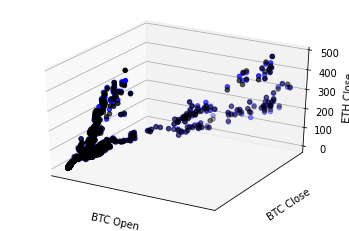

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_test['BTCOpen'], X_test['BTCPrice'], y_test, color="black")
ax.scatter(X_test['BTCOpen'], X_test['BTCPrice'], y_pred, color="blue")
#ax.plot(X_test['BTCOpen'], X_test['BTCPrice'], y_pred, color="blue", linewidth=3)

ax.set_xlabel('BTC Open')
ax.set_ylabel('BTC Close')
ax.set_zlabel('ETH Close')
plt.xticks(())
plt.yticks(())

([], <a list of 0 Text major ticklabel objects>)

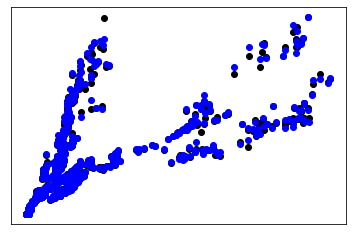

In [ ]:
plt.scatter(X_test['BTCPrice'], y_test, color="black")
# plt.plot(X_test['BTCPrice'], y_pred, color="blue", linewidth=.5)
plt.scatter(X_test['BTCPrice'], y_pred, color="blue")
plt.xticks(())
plt.yticks(())

In [ ]:
# plt.show()